<a href="https://colab.research.google.com/github/YordyNeyraxyz/Innovacion-y-transformacion-Semana17/blob/main/handwritingVideo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Descargar MNIST desde OpenML
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype("int32")

In [ ]:
# Visualización rápida
def plot_images(images, labels):
    n_cols = min(10, len(images))
    n_rows = len(images) // n_cols
    fig = plt.figure(figsize=(8, 8))
    for i in range(n_rows * n_cols):
        sp = fig.add_subplot(n_rows, n_cols, i + 1)
        plt.axis("off")
        plt.imshow(images[i], cmap=plt.cm.gray)
        sp.set_title(str(labels[i]))

    plt.show()

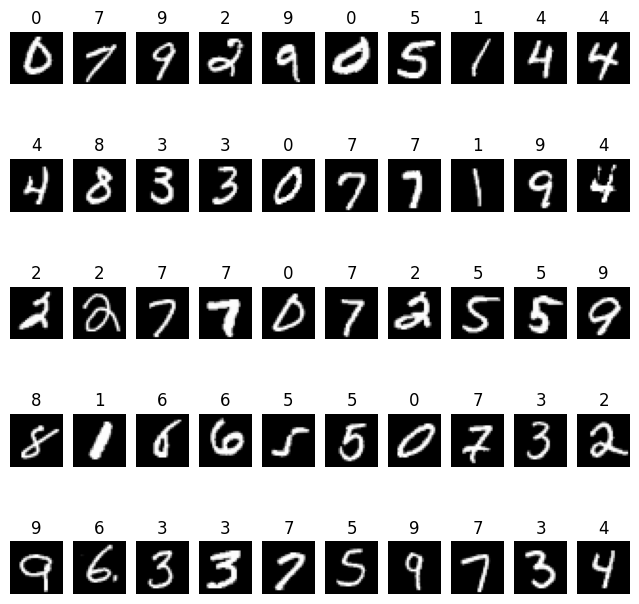

In [ ]:
# Mostrar imágenes aleatorias
p = np.random.permutation(len(X))[:50]
plot_images(X[p].reshape(-1, 28, 28), y[p])

In [ ]:
# MultinomialNB requiere enteros positivos → Escalar 0-255
X = X.astype("int32")

In [ ]:
# División entrenamiento/prueba
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Entrenar clasificador
cls = MultinomialNB()
cls.fit(train_X, train_y)
print("Score:", cls.score(test_X, test_y))

Score: 0.829


In [ ]:
# Clasificación y reporte
predictions = cls.predict(test_X)
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1343
           1       0.88      0.94      0.90      1600
           2       0.88      0.83      0.85      1380
           3       0.80      0.82      0.81      1433
           4       0.84      0.74      0.78      1295
           5       0.86      0.67      0.75      1273
           6       0.88      0.91      0.90      1396
           7       0.94      0.83      0.88      1503
           8       0.67      0.78      0.72      1357
           9       0.70      0.84      0.76      1420

    accuracy                           0.83     14000
   macro avg       0.84      0.83      0.83     14000
weighted avg       0.84      0.83      0.83     14000



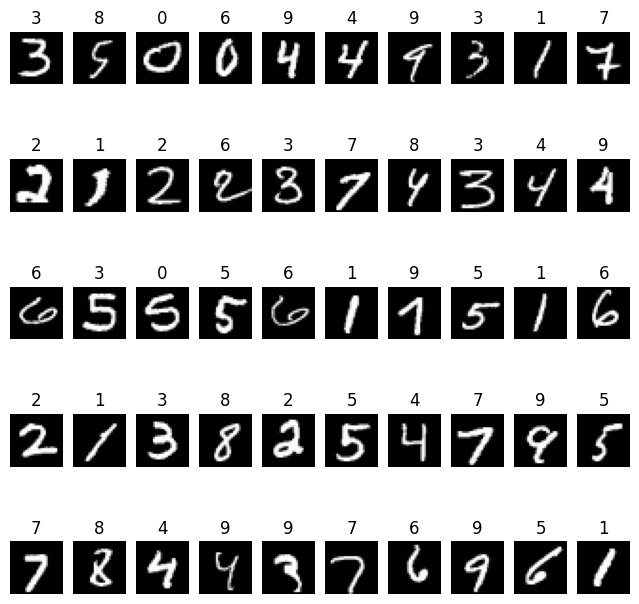

In [ ]:

# Visualizar predicciones
p = np.random.permutation(len(test_X))[:50]
plot_images(test_X[p].reshape(-1, 28, 28), predictions[p])

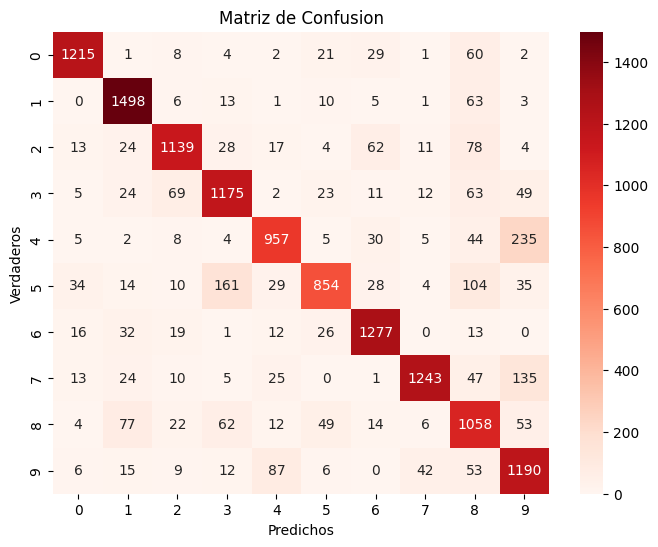

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcular matriz de confusión
cm = confusion_matrix(test_y, predictions)

# Visualizar con heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predichos')
plt.ylabel('Verdaderos')
plt.title('Matriz de Confusion')
plt.show()